<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\rahul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [4]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
data['Created Date']=pd.to_datetime(data['Created Date'])

In [6]:
data['Closed Date']=pd.to_datetime(data['Closed Date'])

<font color=green>converting space to '_' in column names

In [7]:
data.columns = data.columns.str.replace(' ', '_')

In [8]:
data.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
data.describe()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Garage_Lot_Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique_Key                        364558 non-null int64
Created_Date                      364558 non-null datetime64[ns]
Closed_Date                       362177 non-null datetime64[ns]
Agency                            364558 non-null object
Agency_Name                       364558 non-null object
Complaint_Type                    364558 non-null object
Descriptor                        358057 non-null object
Location_Type                     364425 non-null object
Incident_Zip                      361560 non-null float64
Incident_Address                  312859 non-null object
Street_Name                       312859 non-null object
Cross_Street_1                    307370 non-null object
Cross_Street_2                    306753 non-null object
Intersection_Street_1             51120 non-null object
Intersection_Street_2             50512 non-null object
Address_Type        

## create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [11]:
data['Request_Closing_Time' ]=data.Closed_Date-data.Created_Date

In [12]:
data.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [13]:
data.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                         2381
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                          6501
Location_Type                        133
Incident_Zip                        2998
Incident_Address                   51699
Street_Name                        51699
Cross_Street_1                     57188
Cross_Street_2                     57805
Intersection_Street_1             313438
Intersection_Street_2             314046
Address_Type                        3252
City                                2997
Landmark                          364183
Facility_Type                       2389
Status                                 0
Due_Date                               3
Resolution_Description                 0
Resolution_Action_Updated_Date      2402
Community_Board                        0
Borough         

## checkpoint 1

In [14]:
df=data.copy()

In [15]:
df.shape

(364558, 54)

In [16]:
df.drop(['School_or_Citywide_Complaint','Vehicle_Type','Taxi_Company_Borough','Taxi_Pick_Up_Location','Garage_Lot_Name'],axis=1,inplace=True)

In [17]:
df.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [18]:
df.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                         2381
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                          6501
Location_Type                        133
Incident_Zip                        2998
Incident_Address                   51699
Street_Name                        51699
Cross_Street_1                     57188
Cross_Street_2                     57805
Intersection_Street_1             313438
Intersection_Street_2             314046
Address_Type                        3252
City                                2997
Landmark                          364183
Facility_Type                       2389
Status                                 0
Due_Date                               3
Resolution_Description                 0
Resolution_Action_Updated_Date      2402
Community_Board                        0
Borough         

In [19]:
df['City'].dropna(inplace=True)

In [20]:
pd.options.display.max_columns = None
df.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,Cross_Street_1,Cross_Street_2,Intersection_Street_1,Intersection_Street_2,Address_Type,City,Landmark,Facility_Type,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Community_Board,Borough,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Park_Facility_Name,Park_Borough,School_Name,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [21]:
df.Address_Type.value_counts(),df.City.value_counts()

(ADDRESS         292699
 INTERSECTION     50514
 BLOCKFACE        13786
 LATLONG           3931
 PLACENAME          376
 Name: Address_Type, dtype: int64, BROOKLYN               118862
 NEW YORK                77312
 BRONX                   49171
 STATEN ISLAND           15340
 JAMAICA                  8932
 ASTORIA                  7991
 FLUSHING                 7487
 RIDGEWOOD                6392
 CORONA                   5383
 WOODSIDE                 4357
 EAST ELMHURST            3558
 OZONE PARK               3446
 ELMHURST                 3438
 SOUTH RICHMOND HILL      3431
 MASPETH                  3118
 WOODHAVEN                3103
 LONG ISLAND CITY         3028
 SOUTH OZONE PARK         2668
 FRESH MEADOWS            2453
 RICHMOND HILL            2335
 MIDDLE VILLAGE           2291
 QUEENS VILLAGE           2251
 FOREST HILLS             2122
 JACKSON HEIGHTS          2106
 REGO PARK                1807
 BAYSIDE                  1550
 COLLEGE POINT            1544
 FAR ROCK

In [22]:
col=df.columns
name=[]
uni=[]
for c in col:
    name.append(c)
    uni.append(len(df[c].unique()))
    

In [23]:
unique=pd.DataFrame({'col':name,'unique':uni})

In [24]:
unique

,col,unique
0,Unique_Key,364558
1,Created_Date,362018
2,Closed_Date,339838
3,Agency,1
4,Agency_Name,3
5,Complaint_Type,24
6,Descriptor,46
7,Location_Type,19
8,Incident_Zip,202
9,Incident_Address,126373


In [25]:
df.columns


Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Ferry_Direction', 'Ferry_Terminal_Name', 'Latitude', 'Longitude',
       'Location', 'Request_Closing_Time'],
      dtype='object

In [26]:
df.drop(['Park_Facility_Name',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Ferry_Direction', 'Ferry_Terminal_Name','Landmark','Facility_Type','Unique_Key','Agency'],axis=1,inplace=True)

In [27]:
df.columns

Index(['Created_Date', 'Closed_Date', 'Agency_Name', 'Complaint_Type',
       'Descriptor', 'Location_Type', 'Incident_Zip', 'Incident_Address',
       'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Status', 'Due_Date', 'Resolution_Description',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Borough', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

In [28]:
df.head(5)

,Created_Date,Closed_Date,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,Cross_Street_1,Cross_Street_2,Intersection_Street_1,Intersection_Street_2,Address_Type,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Community_Board,Borough,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Park_Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [29]:
df.Agency_Name.value_counts()

New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: Agency_Name, dtype: int64

In [30]:
%matplotlib inline

<font color=red>blocked driveway and illegal parking are the most filed complaint</font>

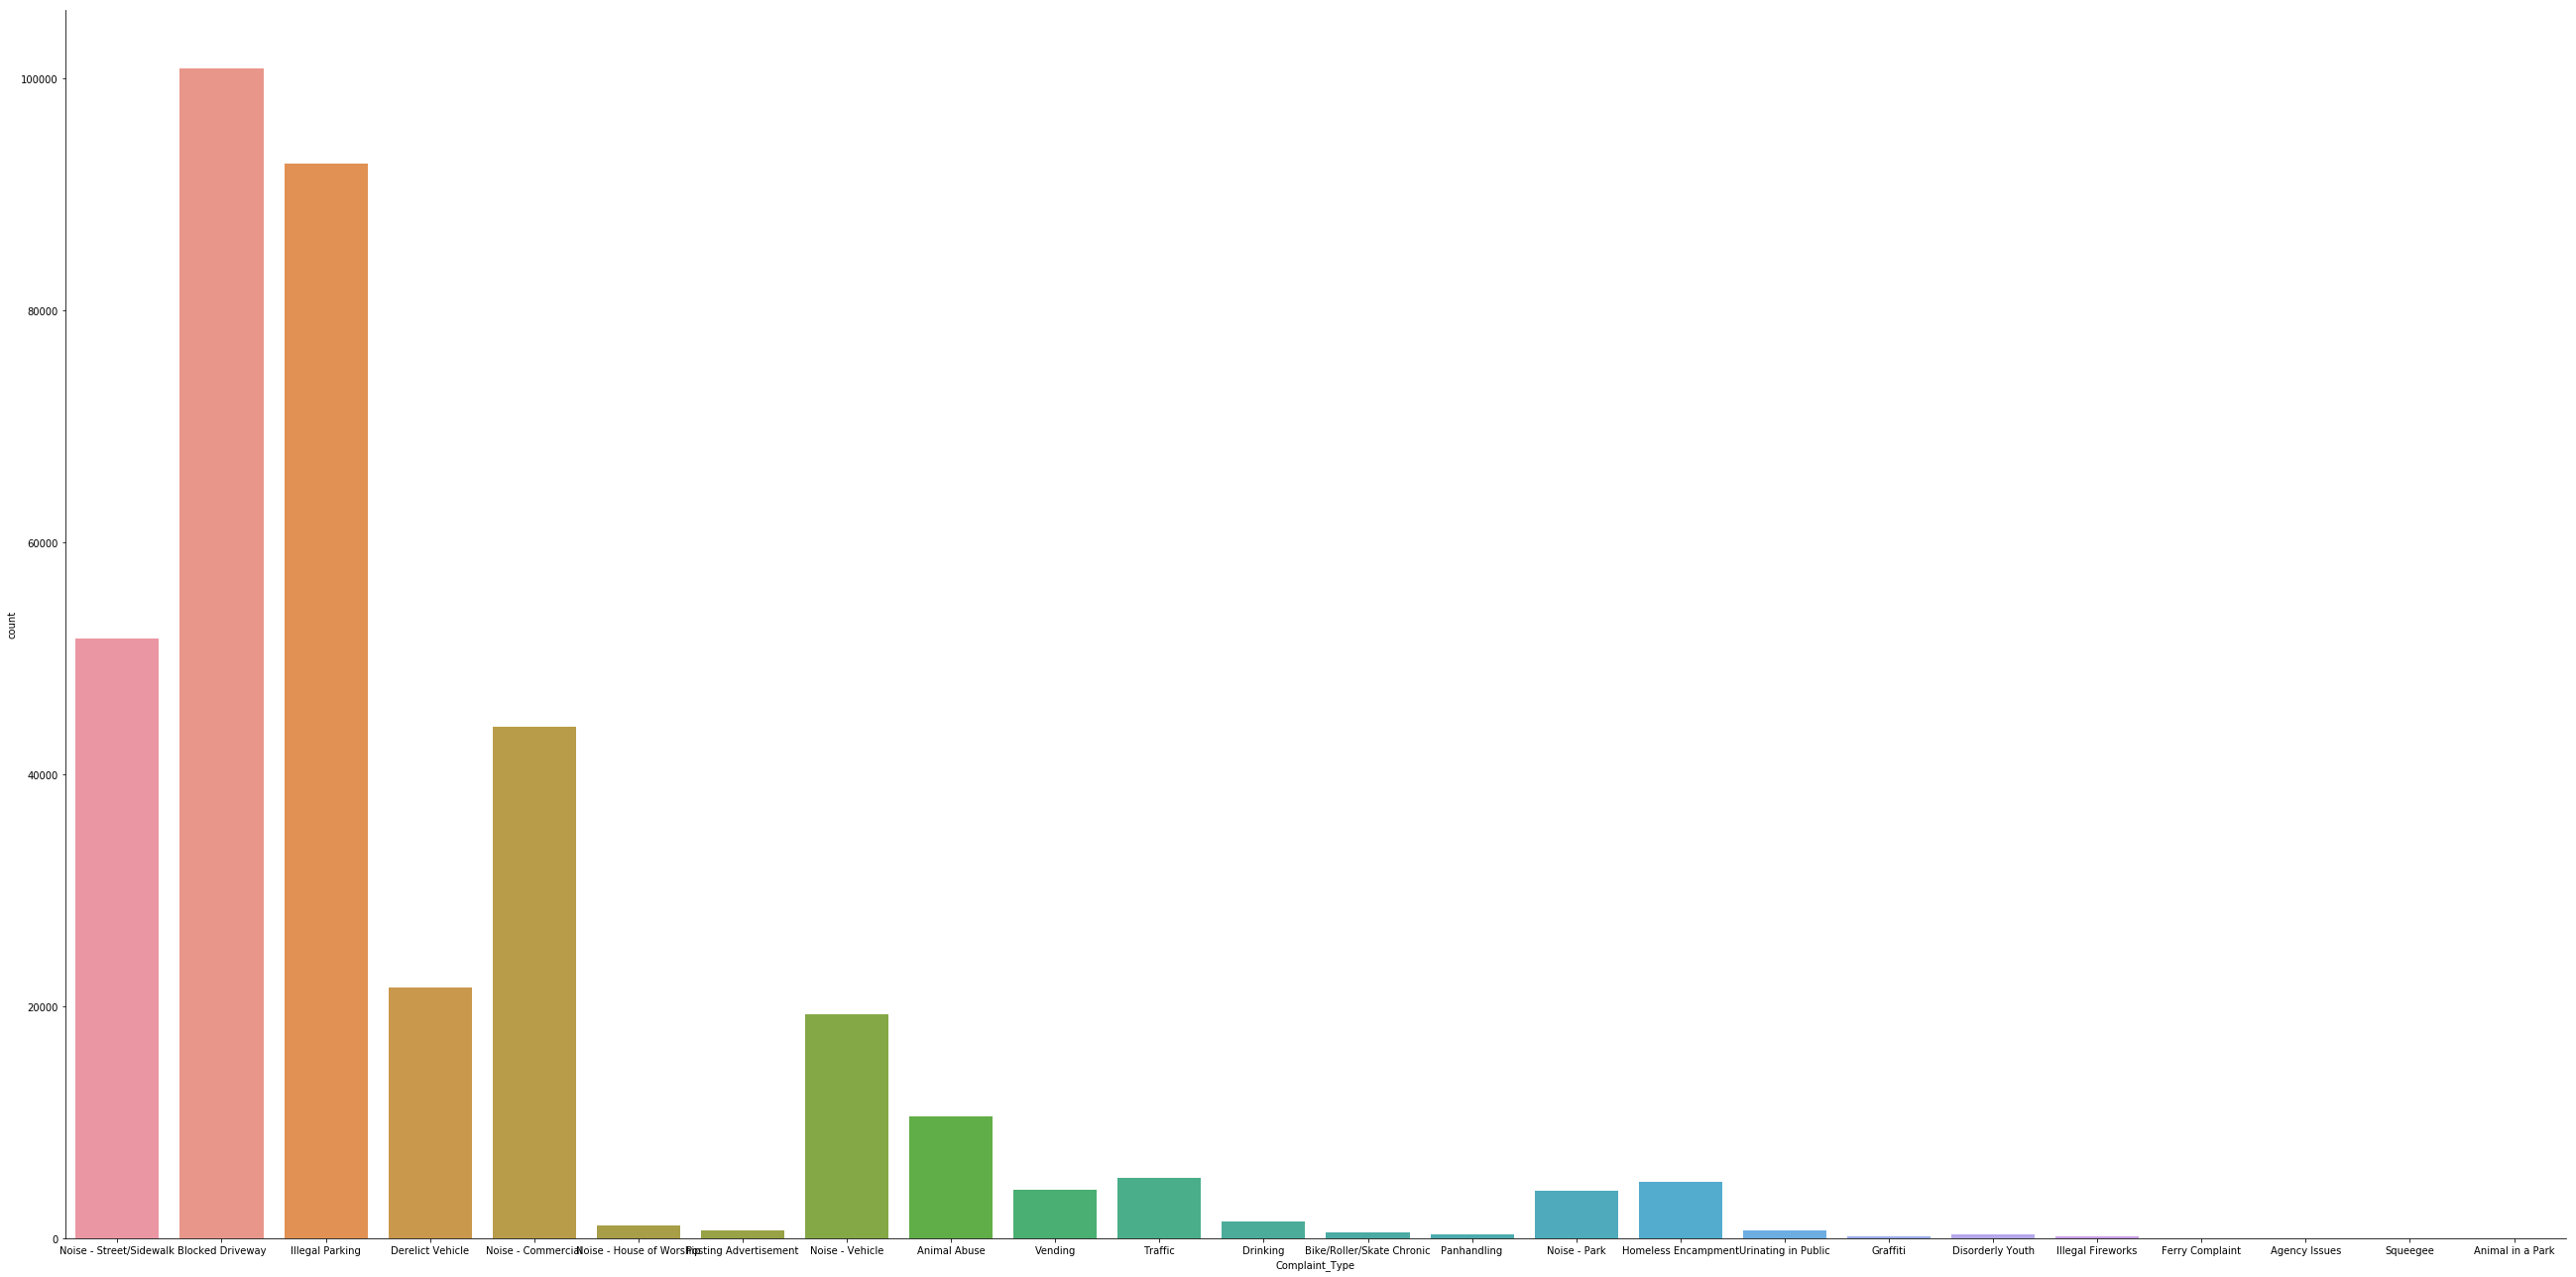

In [42]:
sns.catplot(x='Complaint_Type',data=df,kind='count',height=18,aspect=2)



In [32]:
df.Complaint_Type.value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint_Type, dtype: int64

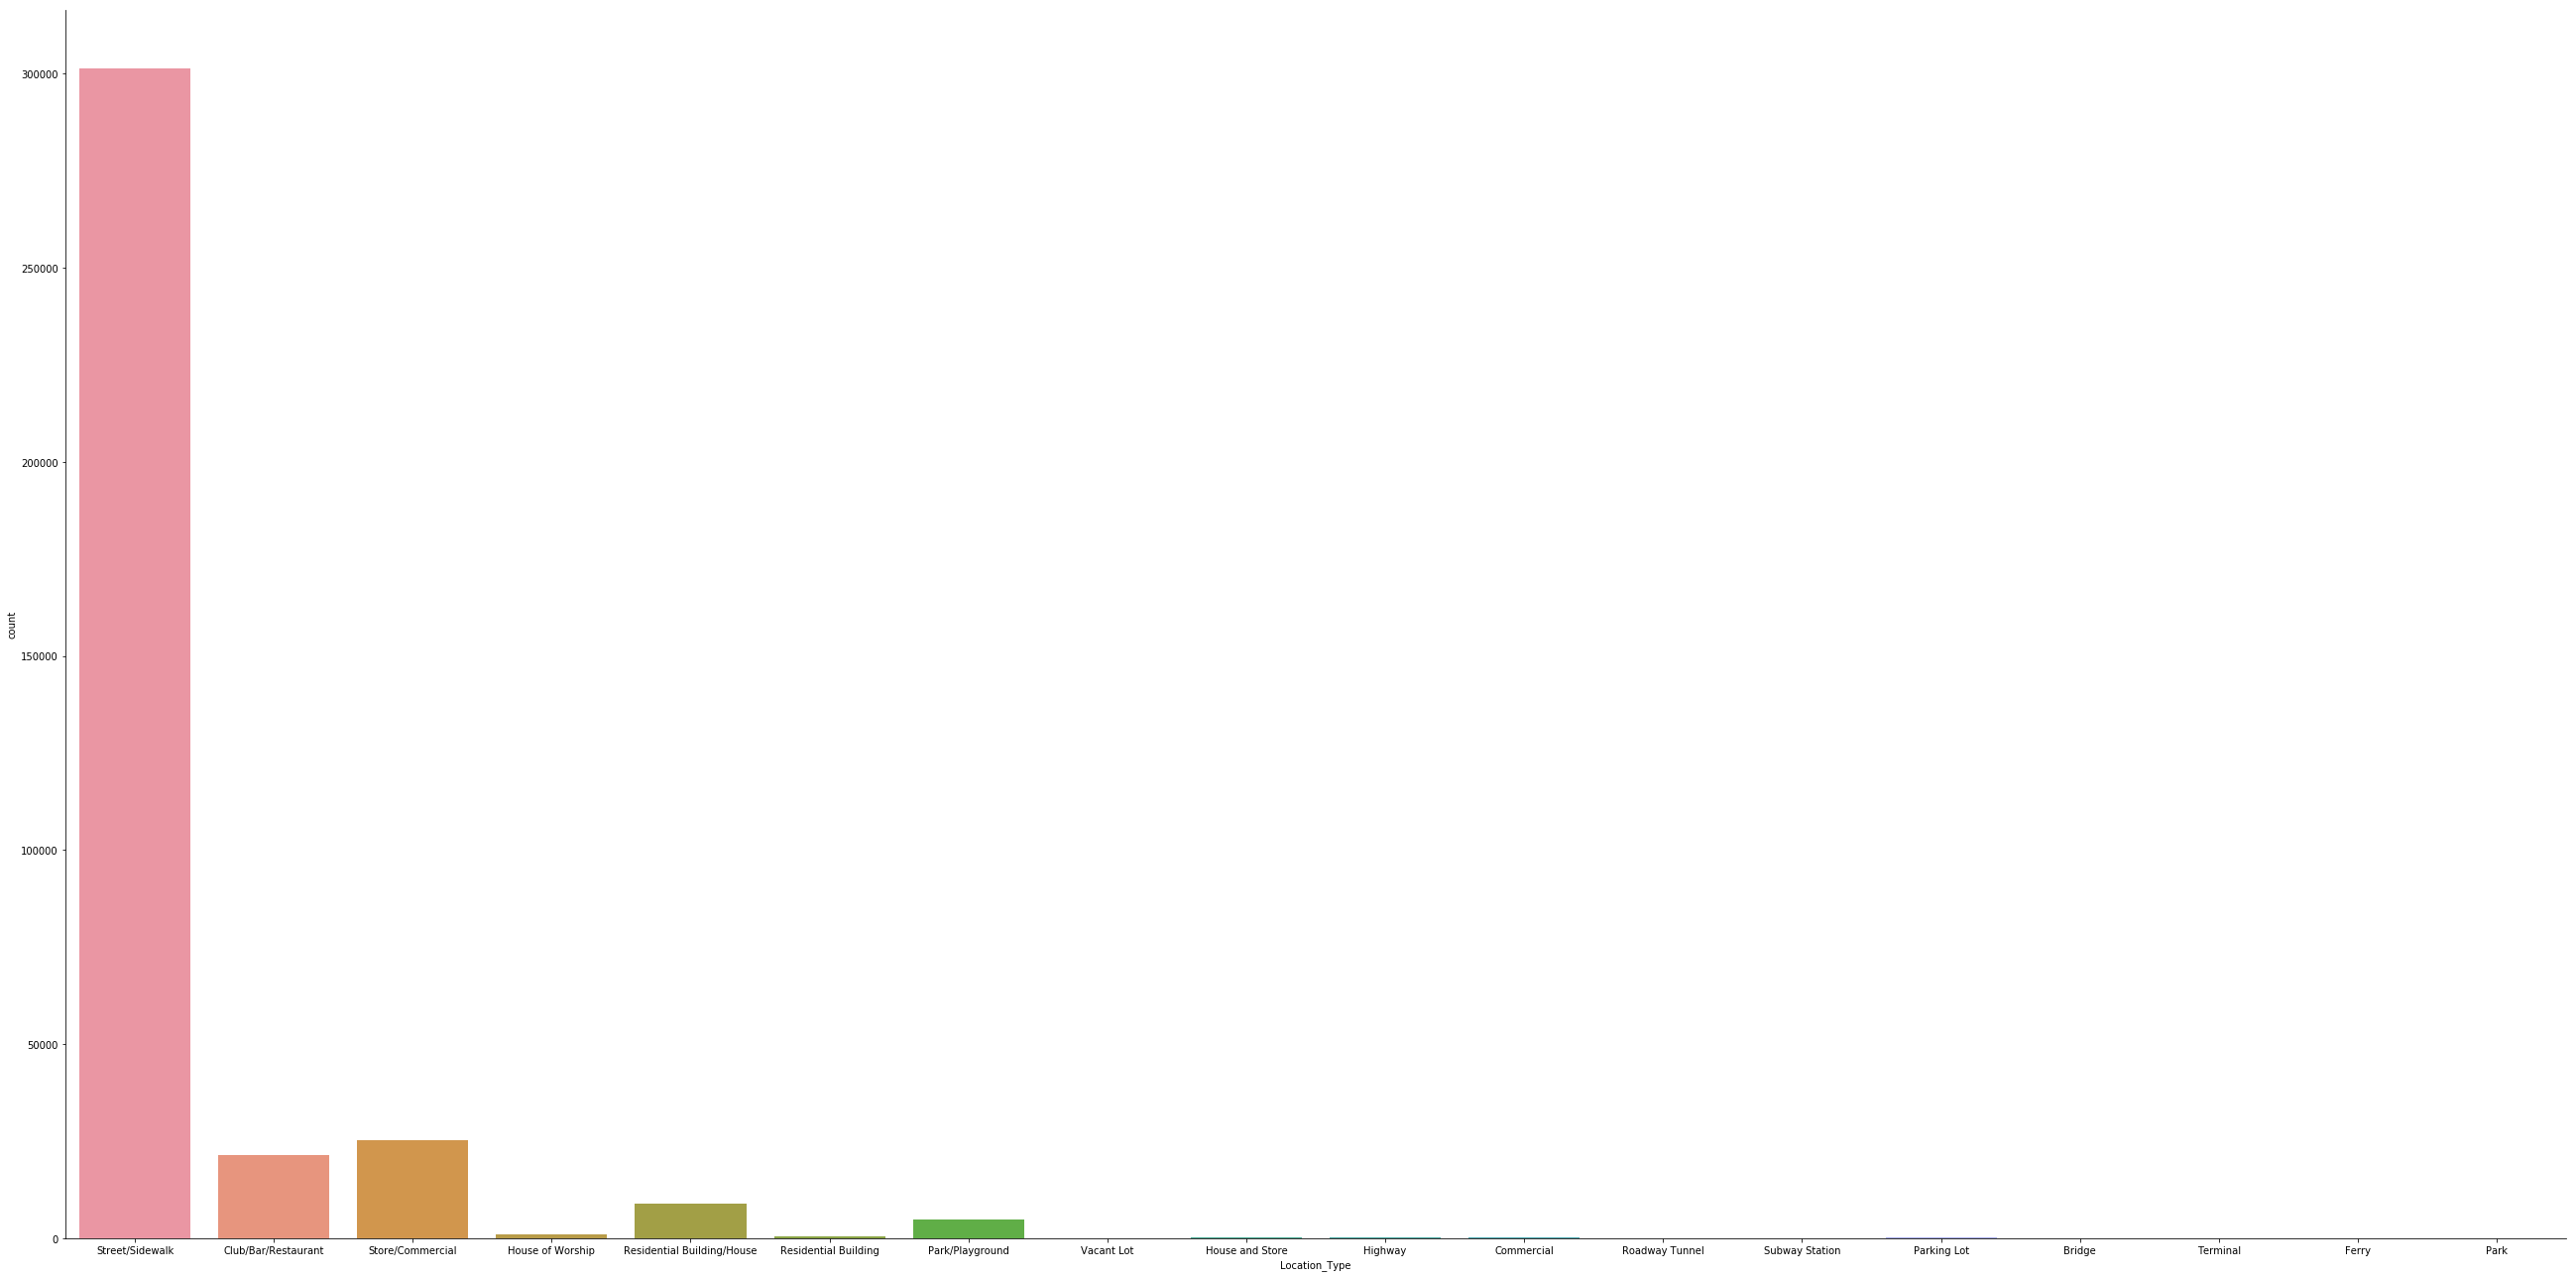

In [33]:
sns.catplot(x='Location_Type',data=df,kind='count',height=18,aspect=2)

<font color=blue>most location is of type **street/sidewalk**</font>

In [34]:
df.Location_Type.value_counts()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location_Type, dtype: int64

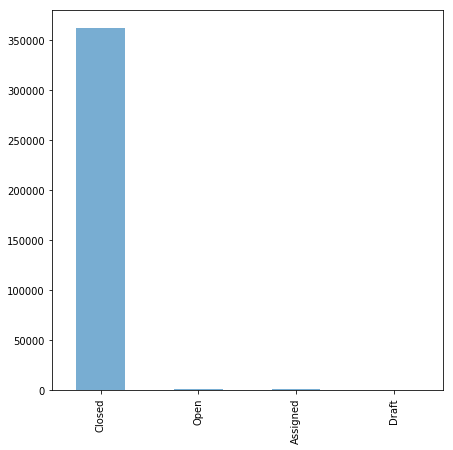

In [35]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

<font color=green>all most all case are closed</font>

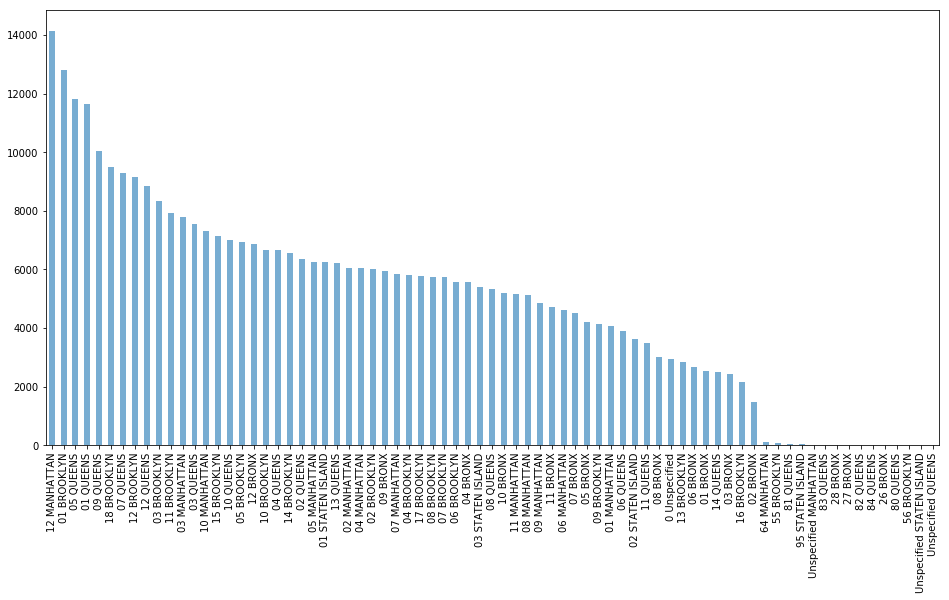

In [44]:
df['Community_Board'].value_counts().plot(kind='bar',alpha=0.6,figsize=(16,8))
plt.show()

manhattan and brooklyn 

In [49]:
df.groupby(['City','Complaint_Type'])['Location_Type'].count()

City       Complaint_Type           
ARVERNE    Animal Abuse                   46
           Blocked Driveway               50
           Derelict Vehicle               32
           Disorderly Youth                2
           Drinking                        1
           Graffiti                        1
           Homeless Encampment             4
           Illegal Parking                62
           Noise - Commercial              2
           Noise - House of Worship       14
           Noise - Park                    2
           Noise - Street/Sidewalk        29
           Noise - Vehicle                10
           Panhandling                     1
           Traffic                         1
           Urinating in Public             1
           Vending                         1
ASTORIA    Animal Abuse                  170
           Bike/Roller/Skate Chronic      16
           Blocked Driveway             3436
           Derelict Vehicle              426
           Disorde

In [51]:

df['Resolution_Action_Updated_Date']=pd.to_datetime(df['Resolution_Action_Updated_Date'])
df['response_time']=df['Resolution_Action_Updated_Date']-df['Created_Date']

In [52]:
df.head(5)

,Created_Date,Closed_Date,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,Cross_Street_1,Cross_Street_2,Intersection_Street_1,Intersection_Street_2,Address_Type,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Community_Board,Borough,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Park_Borough,Latitude,Longitude,Location,Request_Closing_Time,response_time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,2016-01-01 00:55:15,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30,00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,2016-01-01 01:26:57,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13,01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,2016-01-01 04:51:03,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34,04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,2016-01-01 07:43:13,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27,07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,2016-01-01 03:24:42,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44,03:27:44


In [60]:
df.response_time=df.response_time.dt.total_seconds()

In [67]:
df.groupby('Complaint_Type')['response_time'].mean()

Complaint_Type
Agency Issues                1.825638e+04
Animal Abuse                 1.802760e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.311880e+04
Blocked Driveway             1.622753e+04
Derelict Vehicle             2.534635e+04
Disorderly Youth             1.236200e+04
Drinking                     1.381797e+04
Ferry Complaint              5.452888e+06
Graffiti                     2.327434e+04
Homeless Encampment          1.542076e+04
Illegal Fireworks            1.011305e+04
Illegal Parking              1.564495e+04
Noise - Commercial           1.103457e+04
Noise - House of Worship     1.138998e+04
Noise - Park                 1.221563e+04
Noise - Street/Sidewalk      1.218789e+04
Noise - Vehicle              1.255934e+04
Panhandling                  1.585278e+04
Posting Advertisement        7.273556e+03
Squeegee                     1.456025e+04
Traffic                      1.230861e+04
Urinating in Public          1.295963e+04
Vending            

## statistical test

In [68]:
from scipy.stats import f_oneway

In [70]:
mean_t=df[['Complaint_Type','response_time']]

In [72]:
mean_t.head(5)

,Complaint_Type,response_time
0,Noise - Street/Sidewalk,3330.0
1,Blocked Driveway,5233.0
2,Blocked Driveway,17494.0
3,Illegal Parking,27927.0
4,Illegal Parking,12464.0


In [76]:
uni=mean_t.Complaint_Type.unique()

In [77]:
uni.shape

(24,)

In [92]:
from scipy.stats import kruskal

In [93]:
kruskal(mean_t['response_time'][mean_t['Complaint_Type']==uni[0]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[1]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[2]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[3]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[4]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[5]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[6]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[7]],
        mean_t['response_time'][mean_t['Complaint_Type']==uni[8]])

KruskalResult(statistic=nan, pvalue=nan)

In [95]:
from scipy.stats import chisquare

In [97]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le=LabelEncoder()
df.Complaint_Type=le.fit_transform(df.Complaint_Type)


In [102]:
le1=LabelEncoder()
df.Latitude=le.fit_transform(df.Latitude)

In [103]:
chisquare(df.Complaint_Type,df.Latitude)

C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:4653: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)